In [1]:
using VortexCollisions

In [2]:
using PyPlot

In [3]:
Δt = 1E-6;
nt = 5;

In [4]:
M = 64;
N = 64;

In [5]:
Mcut = M;
Ncut = N;

In [6]:
gr = Grid2d(M,N)

Grid2d{64,64,Float64}([0.0, 0.09817477042468103, 0.19634954084936207, 0.2945243112740431, 0.39269908169872414, 0.4908738521234052, 0.5890486225480862, 0.6872233929727672, 0.7853981633974483, 0.8835729338221293  …  5.301437602932776, 5.399612373357457, 5.497787143782138, 5.595961914206819, 5.6941366846315, 5.792311455056181, 5.890486225480862, 5.988660995905543, 6.086835766330224, 6.1850105367549055], [0.0, 0.09817477042468103, 0.19634954084936207, 0.2945243112740431, 0.39269908169872414, 0.4908738521234052, 0.5890486225480862, 0.6872233929727672, 0.7853981633974483, 0.8835729338221293  …  5.301437602932776, 5.399612373357457, 5.497787143782138, 5.595961914206819, 5.6941366846315, 5.792311455056181, 5.890486225480862, 5.988660995905543, 6.086835766330224, 6.1850105367549055], 0.0, 6.283185307179586, 0.0, 6.283185307179586, 2.3530970576022525e-6)

In [7]:
ft = FourierTransform(gr; ℳcut=Mcut, 𝒩cut=Ncut);

In [8]:
op = FokkerPlanckOperator(gr, ft);

In [9]:
const a = 1;
const b = 2;

In [10]:
function u_init(x,y)
    exp(a*cos(x-π) + b*cos(y-π))
end

u_init (generic function with 1 method)

In [11]:
u₀ = get_field(gr);

In [12]:
for j in 1:size(u₀,2)
    for i in 1:size(u₀,1)
         u₀[i,j]  = u_init(gr.x[i], gr.y[j])
    end
end

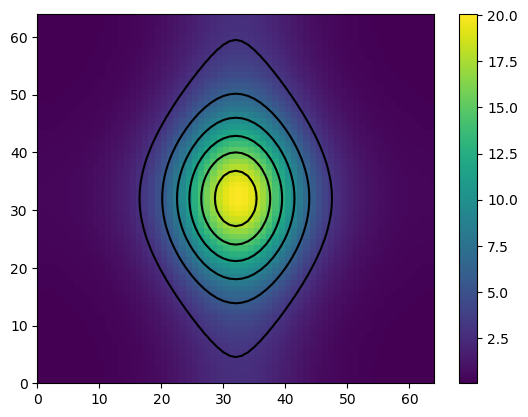

PyObject <matplotlib.colorbar.Colorbar object at 0x144525160>

In [13]:
figure()
contour(u₀, colors="k")
pcolormesh(u₀)
colorbar()

In [14]:
f₀ = zero(u₀);

In [15]:
collision_operator!(op, u₀, f₀);

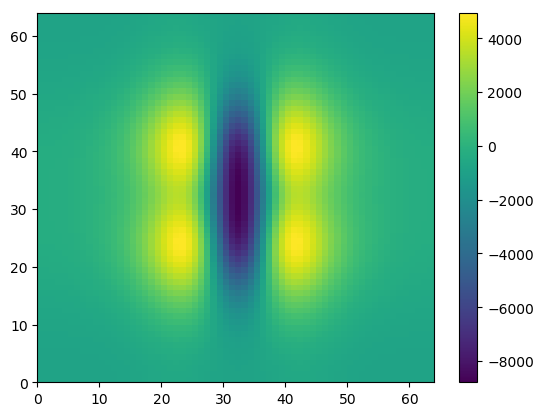

PyObject <matplotlib.colorbar.Colorbar object at 0x12f09afd0>

In [16]:
figure()
pcolormesh(f₀)
colorbar()

In [17]:
u = [zero(u₀) for n in 1:(nt+1)]
u[1] .= u₀;

In [18]:
for n in 1:nt
    timestep!(op, u[n], u[n+1], Δt)
end

In [19]:
nplot = nt+1
u₁ = u[nplot];

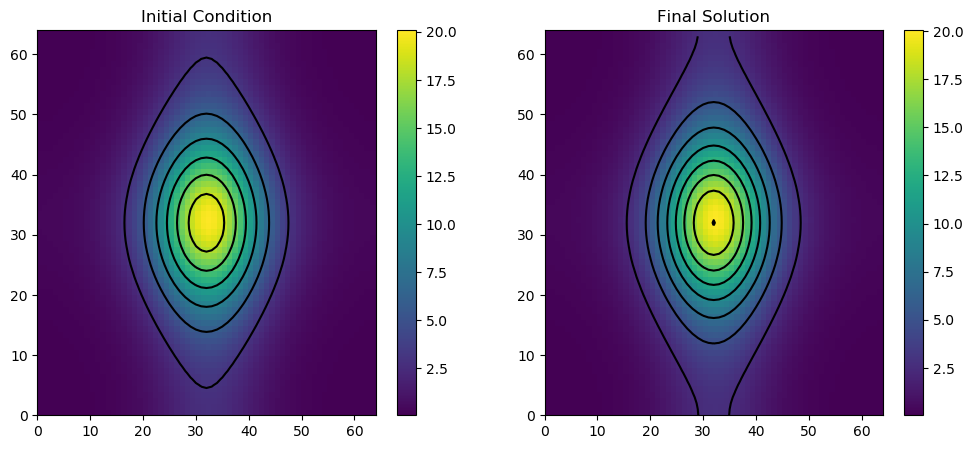

In [20]:
figure(figsize=(12,5))

subplot(121)
contour(u₀, colors="k")
pcolormesh(u₀)
colorbar()
title("Initial Condition")
savefig("solution_initial.png", dpi=150)

subplot(122)
contour(u₁, colors="k")
pcolormesh(u₁)
colorbar()
title("Final Solution")
savefig("solution_final.png", dpi=150)

In [21]:
# compute energy
h₀ = get_field(gr);
h₁ = get_field(gr);

In [22]:
uhat = get_trans(ft)
hhat = get_trans(ft)

prfft!(ft, u₀, uhat)
hhat .= op.Δ⁻¹ .* uhat
irfft!(ft, hhat, h₀)

prfft!(ft, u₁, uhat)
hhat .= op.Δ⁻¹ .* uhat
irfft!(ft, hhat, h₁)
;

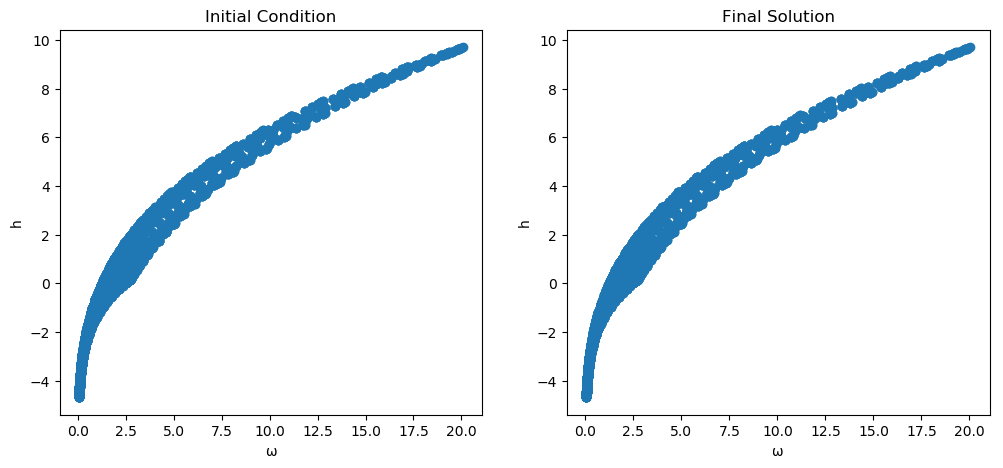

In [23]:
figure(figsize=(12,5))

subplot(121)
scatter(u₀[:], h₀[:])
title("Initial Condition")
xlabel("ω")
ylabel("h")
savefig("scatter_initial.png", dpi=150)

subplot(122)
scatter(u₁[:], h₁[:])
title("Final Solution")
xlabel("ω")
ylabel("h")
savefig("scatter_final.png", dpi=150)